# TASKS 2020

#### Damien Connolly
#### G00340321

In [2]:
import numpy as np
import seaborn as sns

## Task 1 - Counts

Write a Python function that takes a list as input and returns a 
dictionary of unique items in the list as keys and the number of 
times each item appears as values.


I decided to iterate over the list and use each distinct element of the list as a key of the dictionary and store the corresponding count of that key as values. 


Ref:
[1]. https://www.geeksforgeeks.org/counting-the-frequencies-in-a-list-using-dictionary-in-python/

[2]. https://docs.python.org/3/tutorial/controlflow.html

In [101]:
list = ['A', 'A', 'B', 'A', 'C']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'A': 3, 'B': 1, 'C': 1}

In [4]:
list = ['C', 'C', 'B', 'A', 'D']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'C': 2, 'B': 1, 'A': 1, 'D': 1}

In [103]:
list = ['G', 'R', 'B', 'R', 'R', 'T', 'W', 'W']

def counts():

    dict = {}
    for item in list:
        dict[item] = list.count(item)
    return dict
        
    
    for key, value in dict.items(): 
        print (dict)
    
counts()

{'G': 1, 'R': 3, 'B': 1, 'T': 1, 'W': 2}

<br/>

## Task 2

Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred. So,
calling the function as diceroll(k=2, n=1000) should return a dictionary like:
{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}

<br/>
**Text for explanation needed**


Ref:
https://www.codegrepper.com/code-examples/python/dice+rolling+function+python
https://careerkarma.com/blog/python-dictionary-get/
https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
https://stackoverflow.com/questions/5844672/delete-an-element-from-a-dictionary

In [15]:
import numpy as np

def dicerolls(k,n):
    
    # Set variables
    roll = n
    noroll = 0
    dicevalue = k * 6
    
    # Use list to store dice
    dice = []
    for i in range(k):
        dice.append(i+1)
    
    # Dictionary to store result
    dict = {}
   
    while dicevalue > 0:
        dict[dicevalue] = 0
        dicevalue -= 1
        
    # Roll the dice    
    while roll > 0:
        diceroll = np.random.randint(1,7)
        for i in dice:
            result = (diceroll + noroll)
            dicevalue = dict.get(diceroll)
            dict[result] = dicevalue + 1
            noroll += 6
        roll -= 1
        noroll = 0
        
    # Remove 1 from dict output    
    del dict[1]
    
    print(dict)
        
dicerolls(2,1000)

{12: 178, 11: 176, 10: 169, 9: 152, 8: 165, 7: 166, 6: 177, 5: 175, 4: 168, 3: 151, 2: 164}


In [12]:
# Needs work, trying alternative options

import numpy as np

def dicerolls(k,n):

    dice = [2, 3, 4, 5, 6]
    
    dict = {}
    #dicevaule = 0
    
    for i in range(k):
        diceroll = [np.random.choice(dice, k) for i in range(n)]
        result = (diceroll)
        return result
    print(result)

dicerolls(2,4)

[array([3, 5]), array([3, 2]), array([4, 3]), array([3, 3])]

<br/>
<br/>

## Task 3 - numpy.random.binomial


The numpy.random.binomial function can be used to
simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code.

<br/>

Taking the example of a coin toss, there are only two possible outcomes, heads or tails. The probability of getting a heads (success) can be seen as p = 0.5 and the probability of getting a tails (failure) can be seen as q = 1 - p = 0.5. This function can also be used if outcomes are not equal, eg. if the probability of success is p = 0.2 then the probability of failure is q = 1 - 0.2 = 0.8. Each trial is independent since the outcome of the previous toss doesn’t determine or affect the outcome of the current toss.18 The total number of trials can be set using n = 20 and by setting size = 1000 we can run the 20 trials 1000 times and view the outcome.


https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/.
https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

Text(0.5, 0, 'Binomial distribution')

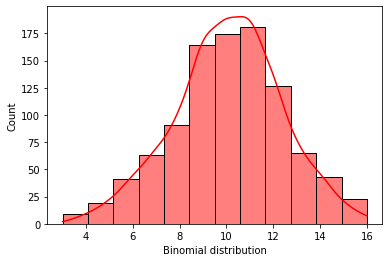

In [3]:
# Coin toss example which displays binomial distribution. 

# Number of trials
size = 1000
# Number of independent coin tosses in each trial
n = 20
# Probability of success for each experiment
p = 0.5

# Run the trials
bd = np.random.binomial(n, p, size)

# Plot the result to show distribution
ax = sns.histplot(bd, kde=True, color='red', bins=12)
ax.set_xlabel ('Binomial distribution')

Text(0.5, 0, 'Binomial distribution')

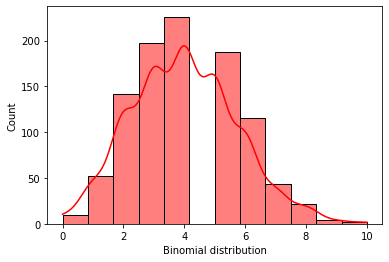

In [4]:
# Example which displays binomial distribution with unequal probability

# Run trials
bd = np.random.binomial(20, 0.2, 1000)

# Plot distribution
ax = sns.histplot(bd, kde=True, color='red', bins=12)
ax.set_xlabel ('Binomial distribution')